In [1]:
import pandas as pd
df = pd.read_csv('SMTO_2015_Complete_Input.csv')
df.head()

,Campus,Level,Status,Mode_Actual,Gender,Licence,Work,Age,HomeZone,Family,...,Domestic.OC,Admission_Avg.SG,Admission_Avg.SC,Admission_Avg.MI,Admission_Avg.YK,Admission_Avg.YG,Admission_Avg.RY,Admission_Avg.OC,Exp_Segment,Exp_Level
0,Scarborough (UTSC),UG,FT,Transit Bus,Female,0,Unknown,20,261,1,...,0.8998,0.893,0.841,0.83,0.817,0.817,0.84,0.824,0.944738,0.944738
1,Downtown Toronto (St. George),Grad,FT,Walk,Female,1,Unknown,25,71,0,...,0.6786,0.893,0.841,0.83,0.817,0.817,0.84,0.824,0.986085,0.986085
2,Downtown Toronto (St. George),UG,FT,Transit Bus,Female,1,Unknown,23,3714,1,...,0.8998,0.893,0.841,0.83,0.817,0.817,0.84,0.824,0.919270,0.919270
3,Downtown Toronto (St. George),UG,FT,Walk,Male,1,Unknown,20,74,0,...,0.8998,0.893,0.841,0.83,0.817,0.817,0.84,0.824,0.919270,0.919270
4,Downtown Toronto (St. George),Grad,FT,Walk,Male,1,Unknown,27,71,0,...,0.6786,0.893,0.841,0.83,0.817,0.817,0.84,0.824,0.986085,0.986085


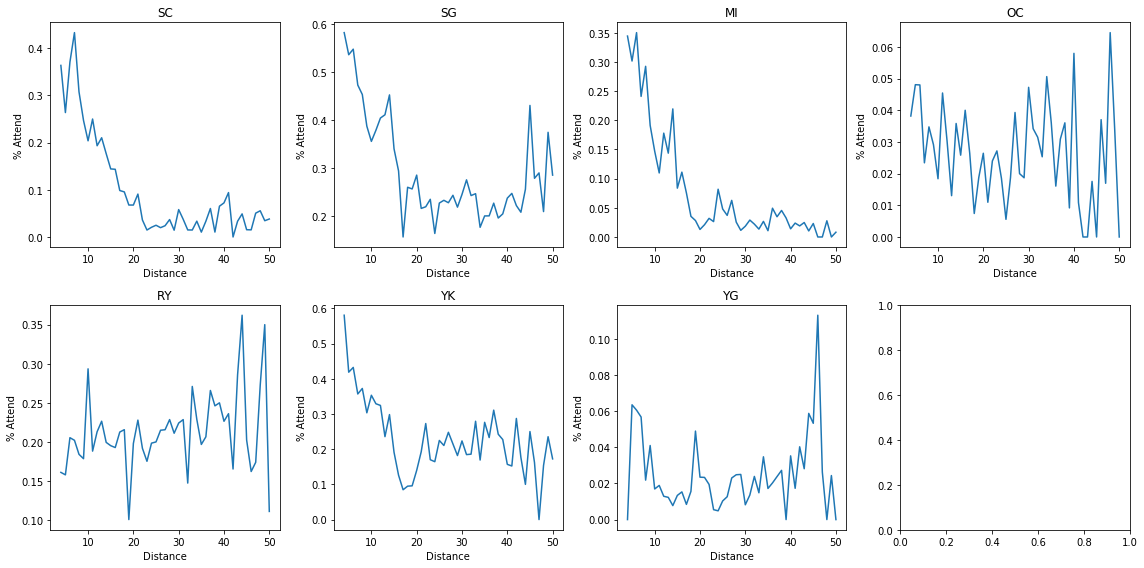

In [61]:
plt.subplots(2, 4, figsize=(16, 8))
for j in range(len(df['School_Codes'].unique())):
    campus = df['School_Codes'].unique()[j]
    y = []
    x = list(range(4, 51, 1))
    prev = list(range(3, 50, 1))
    for i in range(len(x)):
        try:
            y.append(df[(df['Dist.' + campus] <= x[i]) & (df['Dist.' + campus] >= prev[i])]['School_Codes'].value_counts(normalize=True)[campus])
        except:
            y.append(0)
    plt.subplot(2, 4, j+1)
    plt.plot(x, y)
    plt.title(campus)
    plt.xlabel('Distance')
    plt.ylabel('% Attend')
    plt.tight_layout()
plt.show()

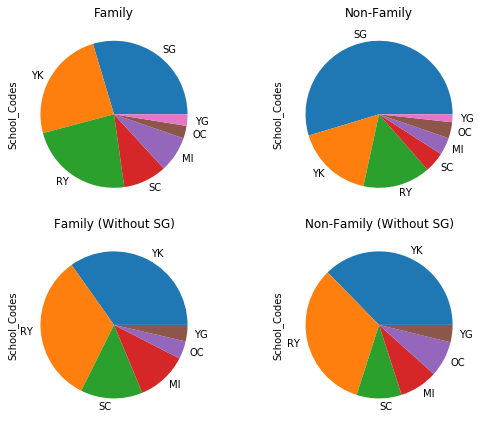

In [78]:
plt.subplots(2,2, figsize=(8, 6))
plt.subplot(2, 2, 1)
plt.title('Family')
df[df['Family'] == 1]['School_Codes'].value_counts().plot.pie()
plt.subplot(2, 2, 2)
plt.title('Non-Family')
df[df['Family'] == 0]['School_Codes'].value_counts().plot.pie()
plt.subplot(2, 2, 3)
plt.title('Family (Without SG)')
df[(df['Family'] == 1) & (df['School_Codes']!= 'SG')]['School_Codes'].value_counts().plot.pie()
plt.subplot(2, 2, 4)
plt.title('Non-Family (Without SG)')
df[(df['Family'] == 0) & (df['School_Codes']!= 'SG')]['School_Codes'].value_counts().plot.pie()
plt.tight_layout()
plt.show()